## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [2]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.90574737, 0.09425263])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [3]:
np.sum(weights * log_returns.mean()) * 250

0.07783400736746934

Expected Portfolio Variance:

In [4]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03276061892009551

Expected Portfolio Volatility:

In [5]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.1809989472900202

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [6]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [7]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.0902893814516476,
  0.16801583692074887,
  0.18925379677290766,
  0.16262312713550256,
  0.13659491182854466,
  0.1329312593986298,
  0.1642788821930596,
  0.16326382920887028,
  0.13231824237000037,
  0.19456991615884806,
  0.18121869098211985,
  0.10096966877486847,
  0.16781808572244175,
  0.1655406717638424,
  0.14045700422831117,
  0.15199002747146215,
  0.15954438672033808,
  0.12783678146797353,
  0.1615306400446251,
  0.11864320975488572,
  0.20846420177163144,
  0.16404365737321344,
  0.16974463923584696,
  0.20355985376393887,
  0.17167457962887783,
  0.12211760467261784,
  0.14408953255723653,
  0.15925122823191612,
  0.1891758573369934,
  0.17197021411002023,
  0.10069251373412508,
  0.10786403576789057,
  0.12089532218389878,
  0.157243980130115,
  0.13100469075125984,
  0.19413004700961753,
  0.1749140570873246,
  0.10430801877801195,
  0.13933352539913332,
  0.20809179399817368,
  0.15545082095895735,
  0.18578083098297085,
  0.19068715855610427,
  0.1628486973795389

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [8]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.09028938, 0.16801584, 0.1892538 , 0.16262313, 0.13659491,
        0.13293126, 0.16427888, 0.16326383, 0.13231824, 0.19456992,
        0.18121869, 0.10096967, 0.16781809, 0.16554067, 0.140457  ,
        0.15199003, 0.15954439, 0.12783678, 0.16153064, 0.11864321,
        0.2084642 , 0.16404366, 0.16974464, 0.20355985, 0.17167458,
        0.1221176 , 0.14408953, 0.15925123, 0.18917586, 0.17197021,
        0.10069251, 0.10786404, 0.12089532, 0.15724398, 0.13100469,
        0.19413005, 0.17491406, 0.10430802, 0.13933353, 0.20809179,
        0.15545082, 0.18578083, 0.19068716, 0.1628487 , 0.15651601,
        0.12935766, 0.11810261, 0.16939386, 0.08815039, 0.19617075,
        0.13651515, 0.14610995, 0.07531979, 0.12229874, 0.12045115,
        0.177644  , 0.10124502, 0.10138029, 0.16655247, 0.14477374,
        0.18722908, 0.20581592, 0.15464179, 0.16142453, 0.07694541,
        0.11204886, 0.21279947, 0.09986861, 0.18107258, 0.14827722,
        0.10128388, 0.18209078, 0.11111661, 0.11

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [9]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [10]:
portfolios.head()

,Return,Volatility
0,0.090289,0.175092
1,0.168016,0.219366
2,0.189254,0.249130
3,0.162623,0.212620
4,0.136595,0.186311


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0, 0.5, 'Expected Return')

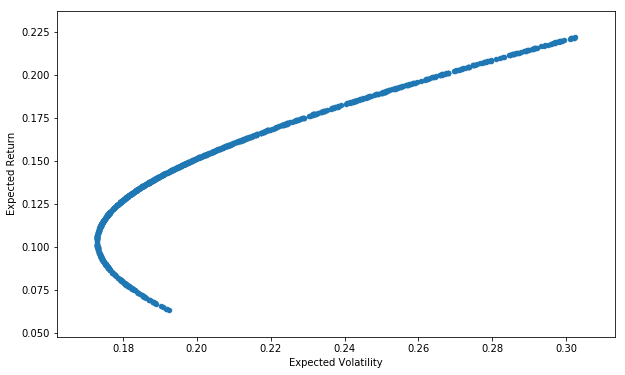

In [11]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [12]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [13]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,69.306335,54.709999,35.239986
2014-01-03,69.077980,54.560001,35.159195
2014-01-06,68.691544,57.200001,35.254677
2014-01-07,68.902321,57.919998,35.658634
2014-01-08,68.357780,58.230000,35.790836


In [14]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [15]:
num_assets = len(assets)
num_assets

3

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.20179746, 0.45980357, 0.33839897])

In [17]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [18]:
np.sum(weights * log_returns.mean()) * 250

0.12788127415213288

Expected Portfolio Variance:

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03529656999754249

Expected Portfolio Volatility:

In [20]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.18787381402830597

*****

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09433062, 0.20730251, 0.11848416, 0.13265714, 0.13090052,
        0.10935451, 0.09877906, 0.1543503 , 0.11331625, 0.14185517,
        0.09959473, 0.13467059, 0.08454848, 0.0884559 , 0.0783523 ,
        0.05135555, 0.13096221, 0.09326993, 0.06076535, 0.16477152,
        0.07067414, 0.10147746, 0.18398367, 0.12197033, 0.06308521,
        0.13680707, 0.14833499, 0.0544725 , 0.08383552, 0.11418894,
        0.08035251, 0.12855493, 0.10358154, 0.10203345, 0.08595941,
        0.1009639 , 0.11359642, 0.0755359 , 0.15944156, 0.10864702,
        0.15891082, 0.09876799, 0.14184737, 0.09993412, 0.06285877,
        0.1174937 , 0.09908547, 0.13693047, 0.08183741, 0.09305541,
        0.15452172, 0.11751946, 0.05661249, 0.11974106, 0.08180462,
        0.13710445, 0.15448247, 0.04949932, 0.09844744, 0.10223903,
        0.13687572, 0.10156822, 0.11046951, 0.18017909, 0.12668889,
        0.10889549, 0.09005811, 0.08403019, 0.14498119, 0.15707781,
        0.07792199, 0.15243666, 0.07403377, 0.06

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

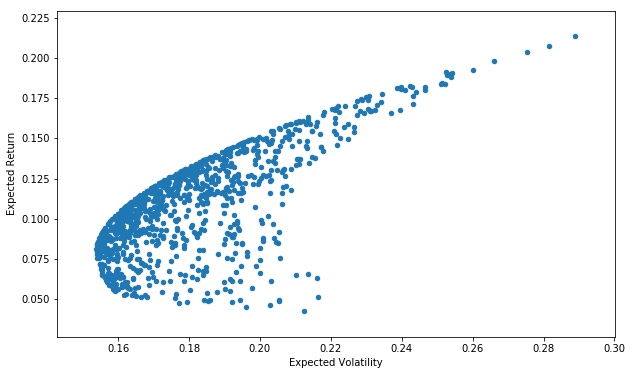

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')